In [128]:
#loaing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
#Task01 a)

#loading data sets
data=pd.read_csv("data.csv")


In [130]:
#Task01 b)

#number od datapoints
nRaws=len(data)
#number of columns
nColumns=len(list(data.columns))

print('Number of Data Points =', nRaws)
print("Number of features =", nColumns-1)

Number of Data Points = 4898
Number of features = 11


In [131]:
#Task01 c)

#shuffling the data
from sklearn.utils import shuffle
white_wine=shuffle(data , random_state=0)

In [132]:
list(white_wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

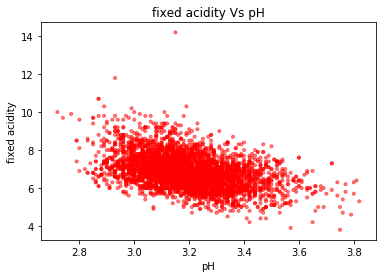

In [133]:
#Task01 d)

#scatter plots
x = np.array(white_wine['pH'])
y = np.array(white_wine['fixed acidity'])
N=len(x)
colors = ['red']*N
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('fixed acidity Vs pH')    
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

In [134]:
#Task02 a)

#PCA Analysis
col=white_wine.columns
features=col.tolist() 
feature=features[:-1] 
target=features[-1]
Xd=white_wine.loc[:,feature].values  #X includes the features
yd=white_wine.loc[:,target].values  #y is the result(defectiveness)

from sklearn.decomposition import PCA

pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(Xd) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
finalDf=pd.concat([principalDf,white_wine['quality']],axis=1)
finalDf.head()



,principal component 1,principal component 2,quality
0,16.359582,-32.894881,6
1,19.000288,-12.726373,6
2,-36.487441,1.199585,6
3,20.867542,13.682175,6
4,25.777628,0.073131,6


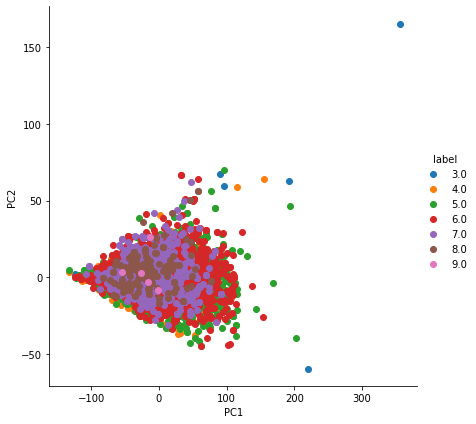

In [135]:
#Task02 b)

#data in the PC1 and PC2 projection space
pca_data_vis = np.vstack((principalComponents[:,:].T,yd)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("PC1","PC2","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

Variance captured by PC1 = 0.9096573439745104
Variance captured by PC2 = 0.07933386311639076


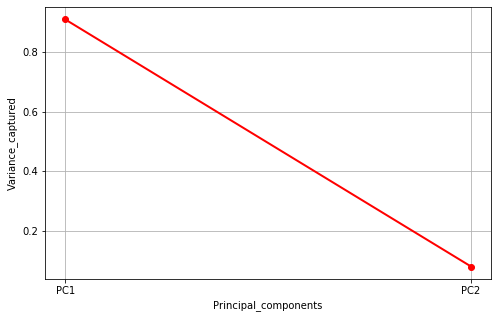

In [136]:
#Task02 c)

#finding variance captured by principal components
percentage_var_explained = pca.explained_variance_ratio_;  

print ('Variance captured by PC1 =',percentage_var_explained[0])
print ('Variance captured by PC2 =',percentage_var_explained[1])

#plot PCA spectrum  (varience captured by the principal components) 
plt.figure(1,figsize=(8,5)) 
plt.plot(['PC1','PC2'],percentage_var_explained,'ro-',linewidth=2)  
plt.xlabel('Principal_components') 
plt.ylabel('Variance_captured')  
plt.grid(True)
plt.show()

In [137]:
#Task03 a)

#validation dataset
dataVal=white_wine.iloc[:1000,:].values  
dataVal=pd.DataFrame(data=dataVal,columns=features) 

#Task03 b)

#test dataset
dataTest=white_wine.iloc[-1000:,:].values  
dataTest=pd.DataFrame(data=dataTest,columns=features) 

#Task03 c)

#train dataset
dataTrain=white_wine.iloc[1000:-1000,:].values  
dataTrain=pd.DataFrame(data=dataTrain,columns=features) 

In [138]:
#Task04 a)

#metric used here is Coefficient of Determination
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
Num=len(dataTrain)
sc=StandardScaler()
Xv=dataVal.loc[:,feature].values
yv=dataVal.loc[:,target].values
Xv=sc.fit_transform(Xv)
r2valList=[]
r2TrainList=[]
for i in range(20):
    Xt=dataTrain.loc[:int(Num*0.05*(i+1)),feature].values
    yt=dataTrain.loc[:int(Num*0.05*(i+1)),target].values  
    Xt=sc.fit_transform(Xt)
    reg = LinearRegression()  
    reg.fit(Xt, yt)
    # ypredVal=reg.predict(Xts)
    # ypredTrain=reg.predict(Xt)
    # # mseVal=mean_squared_error(yts,ypredVal)
    # # mseTrain=mean_squared_error(yt,ypredTrain)
    r2Val=reg.score(Xv,yv)
    r2Train=reg.score(Xt,yt)
    r2valList.append(r2Val)
    r2TrainList.append(r2Train)
    #R^2 means the Coffiefient of Determination
    print('Training Data Percentage : % 5.2f   Validation R^2 : % 4.2f Train R^2 : % 4.2f' %((i+1)*5,r2Val,r2Train))




Training Data Percentage :  5.00   Validation R^2 :  0.23 Train R^2 :  0.28
Training Data Percentage :  10.00   Validation R^2 :  0.24 Train R^2 :  0.28
Training Data Percentage :  15.00   Validation R^2 :  0.24 Train R^2 :  0.28
Training Data Percentage :  20.00   Validation R^2 :  0.24 Train R^2 :  0.29
Training Data Percentage :  25.00   Validation R^2 :  0.24 Train R^2 :  0.31
Training Data Percentage :  30.00   Validation R^2 :  0.24 Train R^2 :  0.30
Training Data Percentage :  35.00   Validation R^2 :  0.24 Train R^2 :  0.30
Training Data Percentage :  40.00   Validation R^2 :  0.24 Train R^2 :  0.31
Training Data Percentage :  45.00   Validation R^2 :  0.24 Train R^2 :  0.31
Training Data Percentage :  50.00   Validation R^2 :  0.24 Train R^2 :  0.30
Training Data Percentage :  55.00   Validation R^2 :  0.24 Train R^2 :  0.31
Training Data Percentage :  60.00   Validation R^2 :  0.25 Train R^2 :  0.30
Training Data Percentage :  65.00   Validation R^2 :  0.25 Train R^2 :  0.30


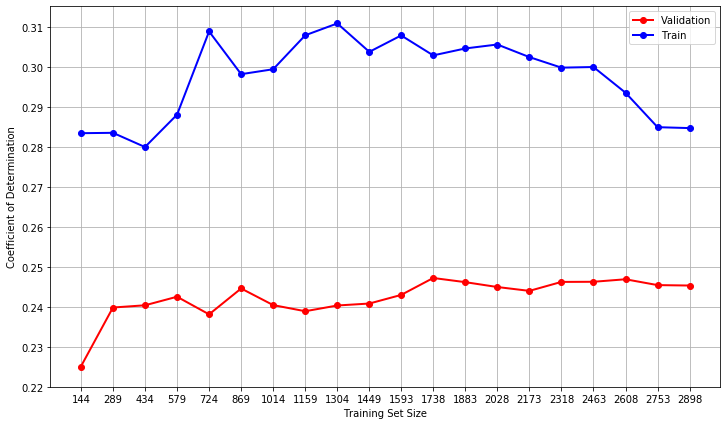

In [139]:
#plotting the learning curve of the size of training set against the performance measurements
plt.figure(1,figsize=(12,7)) 
plt.plot([int(x*Num*0.01) for x in range(5, 105, 5)],r2valList,'ro-',linewidth=2,label='Validation')  
plt.plot([int(x*Num*0.01) for x in range(5, 105, 5)],r2TrainList,'bo-',linewidth=2,label='Train') 
plt.xlabel('Training Set Size') 
plt.ylabel('Coefficient of Determination')  
plt.legend(loc="upper right")
plt.xticks([int(x*Num*0.01) for x in range(5, 105, 5)])
plt.yticks([0.22+x*0.01 for x in range(10)])
plt.grid(True)
plt.show()

In [140]:
#Task04 b)

#The best training set size is 1738 (which is approxiamately 60% of total training set in Task03).The reaon for this choice is that at this size both the training and validation set performance measures are good.You can observe that after 1738 , the training set performance measure slightly decreases as it becomes larger. However the validation performance measurement remains almost the same after 1738

In [141]:
#Task04 c)

#prepaering the test data
Xts=dataTest.loc[:,feature].values
yts=dataTest.loc[:,target].values 
Xts=sc.fit_transform(Xts)

#evaluating on the chosen model on the test dataset
Xt1=dataTrain.loc[:int(Num*0.6),feature].values
yt1=dataTrain.loc[:int(Num*0.6),target].values  
Xt1=sc.fit_transform(Xt1)
reg1 = LinearRegression()  
reg1.fit(Xt1, yt1)
r2Test=reg.score(Xts,yts)
print('Confidence of Determination on Test Dataset is %2.2f' %(r2Test))

Confidence of Determination on Test Dataset is 0.30


In [ ]:
#Task05 a)

# We can observe that the features 'pH' and 'fixed acidity' has an almost inversly propotional relationship. PCA won't be effective here since a proper decision boundary cannot be derived in the PC1 and PC2 space to classify the quality.(That can be seen in the plot in Task02 b). Also the first two principal components captures almost all the variance. Hence this problem is approached through a linear regression model. The best result can be obtained using 60% of the allocated training data. The performance measure used here is coefficient of determination (R^2). A 100% perfect model would have a CoD of 1.00 . The best model chosen seems to be performing well on the Test Dataset even better than the validation dataset. All the datasets have been scaled using a standard scaler.

#Task05 b)

#Since the training dataset (whole allocated training dataset is meant here) and validation dataset is fixed, our observances are not generalized on whole dataset. As a solution, we can shuffle the dataset and conduct the above experiment few times and consider results obtained from all the experiments when drawing the conclusions.     